In [1]:

#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

In [2]:
# extracting camvid data set from fastai library 
path = untar_data(URLs.CAMVID_TINY)

In [3]:
# creating label function for images 
label_func = lambda x:path/'labels'/f'{x.stem}_P{x.suffix}'
# creating segmentation data loader 
dls = SegmentationDataLoaders.from_label_func(
    path, 
    bs=8, 
    fnames = get_image_files(path/'images'),
    label_func = label_func,
    codes = np.loadtxt(path/'codes.txt',dtype=str)
)



In [4]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 165MB/s]


epoch,train_loss,valid_loss,time
0,3.355215,2.635721,00:42


epoch,train_loss,valid_loss,time
0,2.111054,1.793930,00:45
1,1.765928,1.347723,00:44
2,1.549101,1.177075,00:44
3,1.389102,0.986366,00:44
4,1.236802,0.897387,00:46
5,1.111907,0.801640,00:45
6,1.007156,0.766733,00:46
7,0.927012,0.767458,00:45


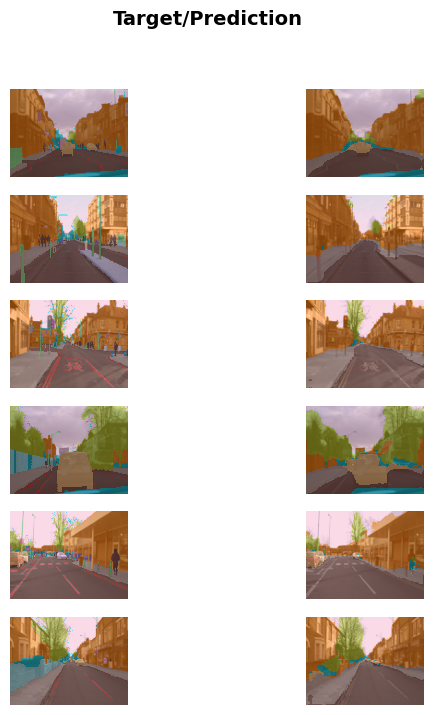

In [5]:
learn.show_results(max_n=6, figsize=(7,8))